In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("team_stats.csv")

if 'Team' in df.columns:
    df = df.set_index('Team')

features = ['AVG', 'OBP', 'SLG', 'wRC+', 'K%', 'BB%', 'HR', 'SB']
df_clean = df[features].copy()

if df_clean['K%'].dtype == object:
    df_clean['K%'] = df_clean['K%'].str.rstrip('%').astype(float)
if df_clean['BB%'].dtype == object:
    df_clean['BB%'] = df_clean['BB%'].str.rstrip('%').astype(float)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), index=df_clean.index, columns=df_clean.columns)

print(df_scaled.head())


           AVG       OBP       SLG      wRC+        K%       BB%        HR  \
Team                                                                         
LAD   1.369750  1.879772  1.944425  1.708998 -0.530142  1.651853  1.934258   
ARI   1.831463  2.042288  1.696376  1.424165 -1.114197  1.071577  1.103672   
NYY   0.446323  1.717256  1.241621  1.614053 -0.619997  3.044516  2.085273   
BAL   0.631008  0.254609  1.489669  1.424165 -0.260578 -0.321086  2.009766   
MIL   0.446323  1.148449  0.166744  0.379777  0.458258  1.767908 -0.179960   

            SB  
Team            
LAD   0.364309  
ARI  -0.036982  
NYY  -0.768748  
BAL  -0.532694  
MIL   2.276344  


C:\Users\Space\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Space\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Space\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Space\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

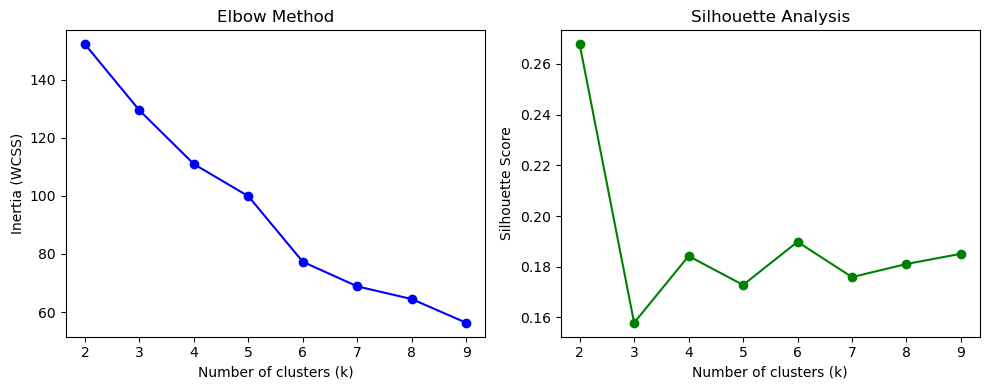

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

In [24]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

df_clean['Cluster'] = df_scaled['Cluster']
print(df_clean.sort_values('Cluster'))

        AVG    OBP    SLG  wRC+    K%   BB%   HR   SB  Cluster
Team                                                          
CHW   0.221  0.278  0.340    75  23.9   6.7  133   90        0
ATL   0.243  0.309  0.415   100  24.0   8.0  213   69        0
DET   0.234  0.300  0.385    95  24.3   7.9  162   76        0
KCR   0.248  0.306  0.403    96  19.4   7.2  170  134        0
COL   0.242  0.304  0.400    82  26.8   7.5  179   85        0
SEA   0.224  0.311  0.376   104  26.8   9.4  185  140        0
CLE   0.238  0.307  0.395   100  20.2   7.9  185  148        0
TOR   0.241  0.313  0.389   101  20.3   8.4  156   72        0
CHC   0.242  0.317  0.393   101  22.3   8.9  170  143        0
MIN   0.246  0.315  0.411   107  21.3   7.7  183   65        0
TEX   0.238  0.305  0.380    95  21.2   8.1  176   97        0
TBR   0.230  0.302  0.366    95  24.7   8.2  147  178        0
OAK   0.233  0.301  0.393   101  24.9   8.2  196   98        0
WSN   0.243  0.309  0.375    92  20.4   7.6  135  223  

C:\Users\Space\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


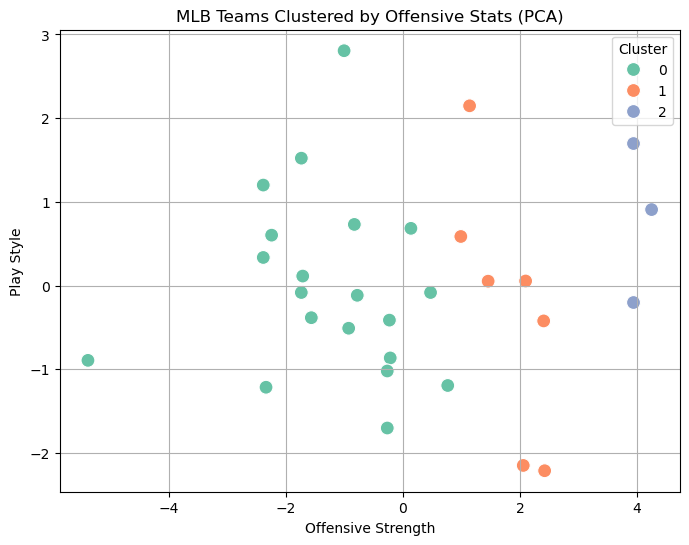

In [28]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

df_viz = pd.DataFrame(components, columns=['PC1', 'PC2'], index=df_scaled.index)
df_viz['Cluster'] = df_scaled['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title('MLB Teams Clustered by Offensive Stats (PCA)')
plt.xlabel('Offensive Strength')
plt.ylabel('Play Style')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()